In [2]:
import tensorflow as tf
import keras
from keras.layers import MaxPooling2D,Flatten,Dropout,AveragePooling2D,SeparableConv2D,ReLU,Input,BatchNormalization,GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda, Softmax
from keras.activations import sigmoid,softmax
from keras.models import Sequential, Model
# import visualkeras
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
from PIL import Image
import random
from glob import glob
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau,CSVLogger
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras import regularizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
# tf.config.run_functions_eagerly(True)

-----------------------------------------------------------------------------------

			Smaple Images



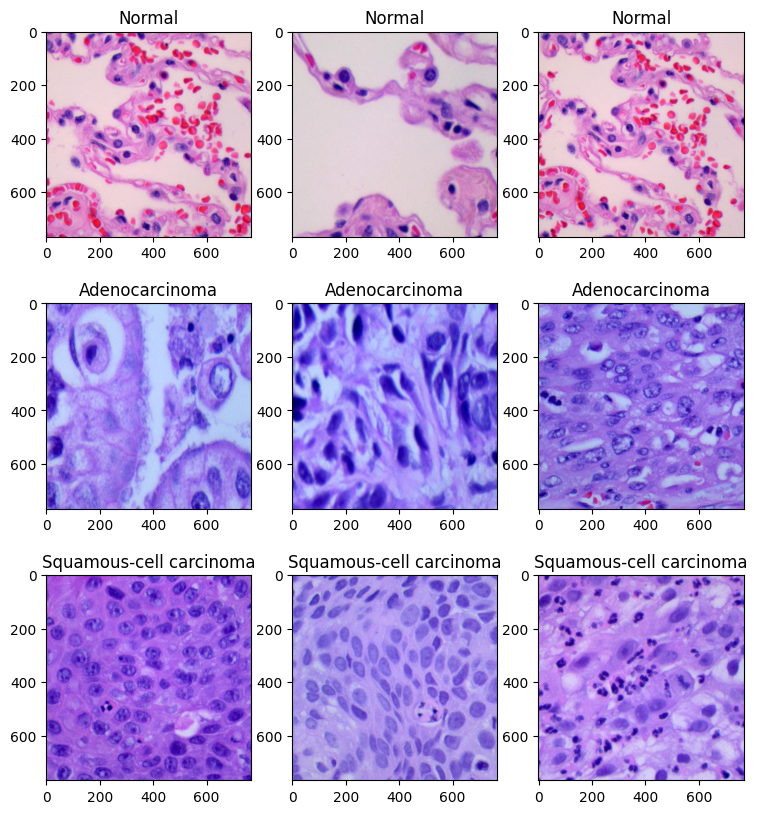

In [3]:
def display_images_from_classes(class_directories,class_names, num_images_to_display, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, 10))

    for class_index, class_directory in enumerate(class_directories):
        image_files = [f for f in os.listdir(class_directory) if f.endswith(('.jpg', '.jpeg', '.png'))]

        for i in range(num_images_to_display):
            if i < len(image_files):
                image_file = image_files[i]
                image_path = os.path.join(class_directory, image_file)
                image = Image.open(image_path)

                ax = axes[class_index, i]

                ax.imshow(image)
                ax.set_title(f'{class_names[class_index]}')

        for i in range(num_images_to_display, num_cols):
            ax = axes[class_index, i]
            ax.axis('off')

    for class_index in range(len(class_directories)):
        for i in range(num_images_to_display, num_cols):
            ax = axes[class_index, i]
            ax.axis('off')

    plt.show()

print("-----------------------------------------------------------------------------------\n")
print("\t\t\tSmaple Images\n")
a1 = "/kaggle/input/lc25000/lc25000/LC25000/lung_split/train/lung_n"
a2 = "/kaggle/input/lc25000/lc25000/LC25000/lung_split/train/lung_aca"
a3 = "/kaggle/input/lc25000/lc25000/LC25000/lung_split/train/lung_scc"
# Specify the directories for the three classes
a_class_directories = [a1,a2,a3]
a_class_names = ['Normal','Adenocarcinoma','Squamous-cell carcinoma']
num_images_to_display = 3
num_rows = len(a_class_directories)  # One row for each class
num_cols = num_images_to_display
display_images_from_classes(a_class_directories, a_class_names,num_images_to_display, num_rows, num_cols)

In [4]:
# Preprocessing train set
a1 = "/kaggle/input/lc25000/lc25000/LC25000/lung_split/train/lung_n"
a2 = "/kaggle/input/lc25000/lc25000/LC25000/lung_split/train/lung_aca"
a3 = "/kaggle/input/lc25000/lc25000/LC25000/lung_split/train/lung_scc"

images = []
labels = []

for filename in os.listdir(a1):
    if filename.endswith(".jpeg"):
        img = cv2.imread(os.path.join(a1, filename))
        img = cv2.resize(img,(122,122))
        img = img.reshape(122,122,3)
#         img = (img - 0.0)/255.0
        img = img_to_array(img)
        images.append(img)
        labels.append(0)

for filename in os.listdir(a2):
    if filename.endswith(".jpeg"):
        img = cv2.imread(os.path.join(a2, filename))
        img = cv2.resize(img,(122,122))
        img = img.reshape(122,122,3)
#         img = (img - 0.0)/255.0
        img = img_to_array(img)
        images.append(img)
        labels.append(1)

for filename in os.listdir(a3):
    if filename.endswith(".jpeg"):
        img = cv2.imread(os.path.join(a3, filename))
        img = cv2.resize(img,(122,122))
        img = img.reshape(122,122,3)
#         img = (img - 0.0)/255.0
        img = img_to_array(img)
        images.append(img)
        labels.append(2)

train_images = np.array(images)
train_labels = np.array(labels)
temp = list(zip(train_images, train_labels))
random.shuffle(temp)
res1, res2 = zip(*temp)
res1, res2 = list(res1), list(res2)

X_train = np.array(res1) / 255.0
y_train= np.array(res2)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)

In [5]:
X_train.shape, y_train.shape

((12000, 122, 122, 3), (12000, 3))

In [6]:
# Preprocessing train set
b1 = "/kaggle/input/lc25000/lc25000/LC25000/lung_split/test/lung_n"
b2 = "/kaggle/input/lc25000/lc25000/LC25000/lung_split/test/lung_aca"
b3 = "/kaggle/input/lc25000/lc25000/LC25000/lung_split/test/lung_scc"

t_images = []
t_labels = []

for filename in os.listdir(b1):
    if filename.endswith(".jpeg"):
        img = cv2.imread(os.path.join(b1, filename))
        img = cv2.resize(img,(122,122))
        img = img.reshape(122,122,3)
#         img = (img - 0.0)/255.0
        img = img_to_array(img)
        t_images.append(img)
        t_labels.append(0)
        
for filename in os.listdir(b2):
    if filename.endswith(".jpeg"):
        img = cv2.imread(os.path.join(b2, filename))
        img = cv2.resize(img,(122,122))
        img = img.reshape(122,122,3)
#         img = (img - 0.0)/255.0
        img = img_to_array(img)
        t_images.append(img)
        t_labels.append(1)

for filename in os.listdir(b3):
    if filename.endswith(".jpeg"):
        img = cv2.imread(os.path.join(b3, filename))
        img = cv2.resize(img,(122,122))
        img = img.reshape(122,122,3)
#         img = (img - 0.0)/255.0
        img = img_to_array(img)
        t_images.append(img)
        t_labels.append(2)
        
test_images = np.array(t_images)
test_labels = np.array(t_labels)

X_test= np.array(test_images)/255.0
y_test= test_labels
y_test_wle = test_labels
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [7]:
X_test.shape, y_test.shape

((3000, 122, 122, 3), (3000, 3))

In [8]:
# model for classificaion
# ip = Input(input_shape=(180,180,3))
from tensorflow.keras.applications.vgg16 import VGG16
input_shape = (122, 122, 3)
input_tensor = Input(shape=input_shape)
base_model = VGG16(weights='imagenet', include_top=False,input_tensor = input_tensor)

x = base_model.output
x = AveragePooling2D(pool_size = (2,2))(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
# x = Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
# x = Dropout(0.5)(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.3)(x)
predictions = Dense(3, activation='softmax')(x)
vgg = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
for layer in base_model.layers:
    layer.trainable = False

In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999)
vgg.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1),
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ]

In [12]:
history = vgg.fit(X_train,y_train,batch_size = 32,epochs=20,validation_data = (X_test,y_test),callbacks = callbacks)

Epoch 1/20


2024-04-27 05:37:16.824369: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14884: 3.51133, expected 3.01958
2024-04-27 05:37:16.824430: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14912: 3.78988, expected 3.29813
2024-04-27 05:37:16.824440: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14913: 3.74264, expected 3.25089
2024-04-27 05:37:16.824448: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14957: 3.90195, expected 3.4102
2024-04-27 05:37:16.824465: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14959: 3.66995, expected 3.1782
2024-04-27 05:37:16.824473: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14961: 3.41803, expected 2.92628
2024-04-27 05:37:16.824481: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14963: 3.78256, expected 3.29081
2024-04-27 05:37:16.824489: E

  5/375 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.3558 - loss: 2.0588   

I0000 00:00:1714196243.537325     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6607 - loss: 1.2502

2024-04-27 05:37:36.951839: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 88: 3.35061, expected 2.91148
2024-04-27 05:37:36.951927: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2073: 3.2713, expected 2.83216
2024-04-27 05:37:36.951959: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3903: 3.23375, expected 2.79462
2024-04-27 05:37:36.951974: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4025: 3.37722, expected 2.93808
2024-04-27 05:37:36.952004: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4147: 3.05651, expected 2.61738
2024-04-27 05:37:36.952034: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6832: 3.20113, expected 2.76199
2024-04-27 05:37:36.952113: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14762: 2.29062, expected 1.85149
2024-04-27 05:37:36.952129: E extern

375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.6610 - loss: 1.2495 - val_accuracy: 0.8913 - val_loss: 0.8905 - learning_rate: 1.0000e-04
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.8633 - loss: 0.7681 - val_accuracy: 0.9080 - val_loss: 0.8383 - learning_rate: 1.0000e-04
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.8915 - loss: 0.6637 - val_accuracy: 0.9203 - val_loss: 0.8287 - learning_rate: 1.0000e-04
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9116 - loss: 0.6070 - val_accuracy: 0.9250 - val_loss: 0.7887 - learning_rate: 1.0000e-04
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9210 - loss: 0.5534 - val_accuracy: 0.9290 - val_loss: 0.7597 - learning_rate: 1.0000e-04
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9223 - loss: 0.5253 - val_accuracy: 0.9347 - val_loss: 0.7046 - learning_rate: 1.0000e-04
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accurac

In [13]:
vgg.save('vgg_lc_v3.h5')

In [14]:
test_loss, test_accuracy = vgg.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9738 - loss: 0.2343
Test Loss: 0.575607180595398
Test Accuracy: 0.9470000267028809


In [15]:
"""Training loss and accuray values after each epoch"""
# epochs = hp["num_epochs"]
epochs = [i for i in range(1,20+1)]
loss_values = history.history['loss']
acc = history.history['accuracy']
vloss_values = history.history['val_loss']
vacc = history.history['val_accuracy']


/tmp/ipykernel_34/2372609618.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, vloss_values, 'b', color = 'g',label='Validation loss')
/tmp/ipykernel_34/2372609618.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, vacc, 'b', color = 'g',label='Validation accuracy')


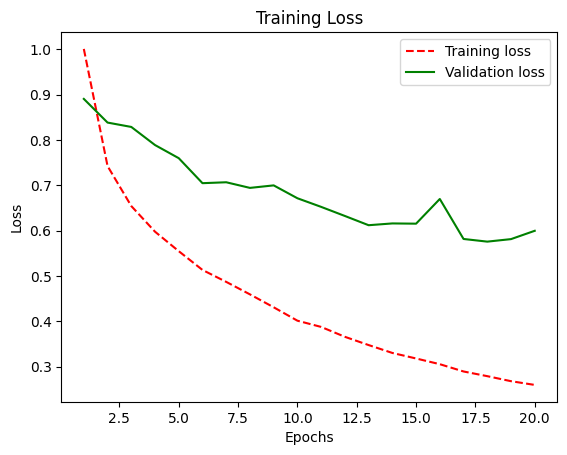

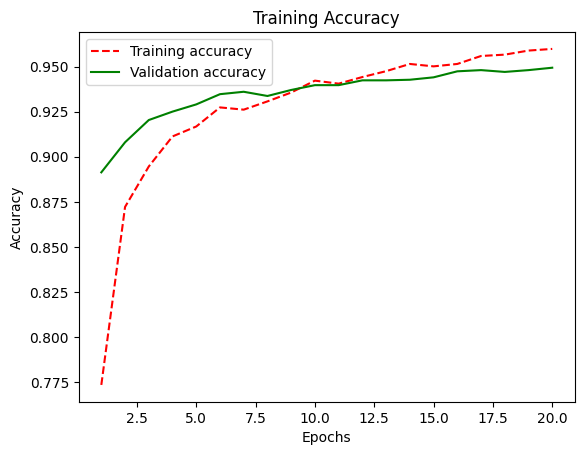

In [16]:
"""plotting values"""
# epochs = [i for i in range(len(hp['num_epochs']))]

# Plot training and validation loss
plt.plot(epochs, loss_values, '--', color = 'r',label='Training loss')
plt.plot(epochs, vloss_values, 'b', color = 'g',label='Validation loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('training_validation_loss.png') 
# plt.close()
# Plot training and validation accuracy
plt.figure()
plt.plot(epochs, acc, '--',color = 'r', label='Training accuracy')
plt.plot(epochs, vacc, 'b', color = 'g',label='Validation accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('training_validation_accuracy.png') 
# plt.close()

plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


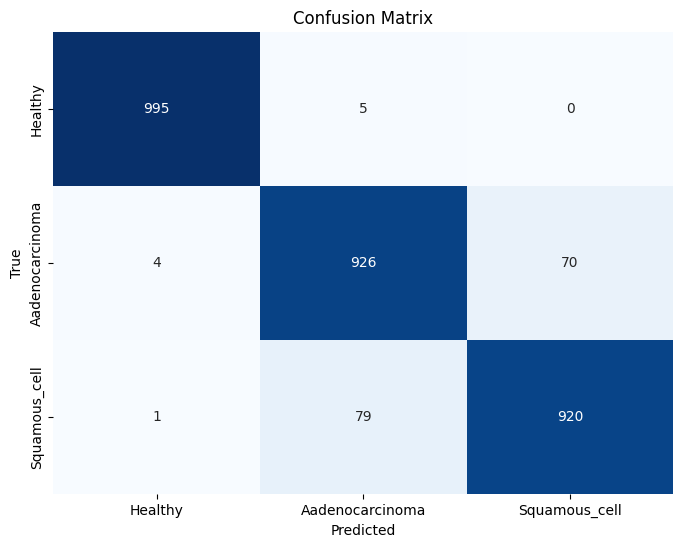

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = vgg.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test_wle
# print(predictions[:10],true_classes[:10])
conf_mat = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Healthy", "Aadenocarcinoma","Squamous_cell"],
            yticklabels=["Healthy", "Aadenocarcinoma","Squamous_cell"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
# plt.savefig('cf_matrix3.png')
# plt.close()
plt.show()

target_names = ["Healthy", "Aadenocarcinoma","Squamous_cell"]


In [18]:
print(classification_report(true_classes, predicted_classes, target_names=target_names))

                 precision    recall  f1-score   support

        Healthy       0.99      0.99      0.99      1000
Aadenocarcinoma       0.92      0.93      0.92      1000
  Squamous_cell       0.93      0.92      0.92      1000

       accuracy                           0.95      3000
      macro avg       0.95      0.95      0.95      3000
   weighted avg       0.95      0.95      0.95      3000



In [ ]:
vgg.summary()

In [ ]:
# model.save('lung_cancer.h5')

In [ ]:
# tf.keras.models.save_model(model,'lung_cancer.h5')